# At rest dataset k-NN

In [50]:
import numpy as np
import scipy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import sklearn.metrics
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler, LabelEncoder
from PIL import Image
import time

In [51]:
def create_array(df):
    scaled = True
    arr = np.array(df["Signal"])
    arr_numpy = []
    for i in range(len(arr)):
        arr[i] = arr[i].replace("[","")
        arr[i] = arr[i].replace("\n","")
        arr[i] = arr[i].replace("]","")
        float_list = []
        for item in arr[i].split():  
            float_list.append(float(item))
        arr_numpy.append(float_list)
        
    arr_numpy = np.array(arr_numpy)
    if scaled:
        scaler = StandardScaler()
        arr_numpy = scaler.fit_transform(arr_numpy.T).T
    return arr_numpy , np.array(df["Label"])

# ECG

In [52]:
accuracy = np.load('accuracy_ecg.npy')
accuracy_PCA = np.load('accuracy_ecg_PCA.npy')
accuracy_no = np.load('accuracy_ecg_NO.npy')
accuracy_PCA_no = np.load('accuracy_ecg_PCA_NO.npy')

In [53]:
ecg = pd.read_csv("../DATA_CSV/ECG_filtered_noscaled.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")

train_ecg_df, test_ecg_df = train_test_split(ecg, test_size=0.2, stratify=ecg['Label'], random_state=123)

num_train_ecg_Simo   = sum(train_ecg_df['Label'] == 0)
num_train_ecg_Luci   = sum(train_ecg_df['Label'] == 1)
num_train_ecg_Linda  = sum(train_ecg_df['Label'] == 2)
num_train_ecg_Marghe = sum(train_ecg_df['Label'] == 3)

num_test_ecg_Luci   = sum(test_ecg_df['Label'] == 1)
num_test_ecg_Simo   = sum(test_ecg_df['Label'] == 0)
num_test_ecg_Linda  = sum(test_ecg_df['Label'] == 2)
num_test_ecg_Marghe = sum(test_ecg_df['Label'] == 3)

print('TRAIN SET ECG')
print('\tSimo ECG: {} ({:.2f}%)'.format(num_train_ecg_Simo, 100 * num_train_ecg_Simo / len(train_ecg_df)))
print('\tLuci ECG: {} ({:.2f}%)'.format(num_train_ecg_Luci, 100 * num_train_ecg_Luci / len(train_ecg_df)))
print('\tLinda ECG: {} ({:.2f}%)'.format(num_train_ecg_Linda, 100 * num_train_ecg_Linda / len(train_ecg_df)))
print('\tMarghe ECG: {} ({:.2f}%)'.format(num_train_ecg_Marghe, 100 * num_train_ecg_Marghe / len(train_ecg_df)))

print('VALIDATION SET ECG')
print('\tSimo ECG: {} ({:.2f}%)'.format(num_test_ecg_Simo, 100 * num_test_ecg_Simo / len(test_ecg_df)))
print('\tLuci ECG: {} ({:.2f}%)'.format(num_test_ecg_Luci, 100 * num_test_ecg_Luci / len(test_ecg_df)))
print('\tLinda ECG: {} ({:.2f}%)'.format(num_test_ecg_Linda, 100 * num_test_ecg_Linda / len(test_ecg_df)))
print('\tMarghe ECG: {} ({:.2f}%)'.format(num_test_ecg_Marghe, 100 * num_test_ecg_Marghe / len(test_ecg_df)))


TRAIN SET ECG
	Simo ECG: 2384 (21.03%)
	Luci ECG: 3144 (27.73%)
	Linda ECG: 3400 (29.99%)
	Marghe ECG: 2408 (21.24%)
VALIDATION SET ECG
	Simo ECG: 596 (21.02%)
	Luci ECG: 786 (27.72%)
	Linda ECG: 851 (30.02%)
	Marghe ECG: 602 (21.23%)


In [54]:
ecg_mat_train, label_ecg_train = create_array(train_ecg_df) 
ecg_mat_test, label_ecg_test  = create_array(test_ecg_df) 

In [8]:
accuracy = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(ecg_mat_train, label_ecg_train) 
    Pred_y = neigh.predict(ecg_mat_test) 
    accuracy.append(sklearn.metrics.accuracy_score(label_ecg_test, Pred_y))

In [55]:
t = []
#np.save('accuracy_ecg.npy', np.array(accuracy))
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy)+1, weights = 'distance', algorithm = 'brute').fit(ecg_mat_train, label_ecg_train)
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy))

Execution time =  0.003303422927856445
Highest accuracy =  0.9989417989417989


### Clustering after PCA

In [56]:
num_components = 0.95
pca2 = PCA(n_components = num_components)
pca2.fit(ecg_mat_train)
Y_hat_train = pca2.transform(ecg_mat_train)
Y_hat_test = pca2.transform(ecg_mat_test)

In [14]:
accuracy_PCA = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ecg_train) 
    Pred_y = neigh.predict(Y_hat_test) 
    accuracy_PCA.append(sklearn.metrics.accuracy_score(label_ecg_test, Pred_y))

In [57]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_PCA)+1, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ecg_train)
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_PCA))

Execution time =  0.0015352678298950196
Highest accuracy =  0.9809523809523809


### Non filtered

In [58]:
ecg = pd.read_csv("../DATA_CSV/ECG_nofiltered_noscaled.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")

train_ecg_df, test_ecg_df = train_test_split(ecg, test_size=0.2, stratify=ecg['Label'], random_state=123)

num_train_ecg_Simo   = sum(train_ecg_df['Label'] == 0)
num_train_ecg_Luci   = sum(train_ecg_df['Label'] == 1)
num_train_ecg_Linda  = sum(train_ecg_df['Label'] == 2)
num_train_ecg_Marghe = sum(train_ecg_df['Label'] == 3)

num_test_ecg_Luci   = sum(test_ecg_df['Label'] == 1)
num_test_ecg_Simo   = sum(test_ecg_df['Label'] == 0)
num_test_ecg_Linda  = sum(test_ecg_df['Label'] == 2)
num_test_ecg_Marghe = sum(test_ecg_df['Label'] == 3)

print('TRAIN SET ECG')
print('\tSimo ECG: {} ({:.2f}%)'.format(num_train_ecg_Simo, 100 * num_train_ecg_Simo / len(train_ecg_df)))
print('\tLuci ECG: {} ({:.2f}%)'.format(num_train_ecg_Luci, 100 * num_train_ecg_Luci / len(train_ecg_df)))
print('\tLinda ECG: {} ({:.2f}%)'.format(num_train_ecg_Linda, 100 * num_train_ecg_Linda / len(train_ecg_df)))
print('\tMarghe ECG: {} ({:.2f}%)'.format(num_train_ecg_Marghe, 100 * num_train_ecg_Marghe / len(train_ecg_df)))

print('VALIDATION SET ECG')
print('\tSimo ECG: {} ({:.2f}%)'.format(num_test_ecg_Simo, 100 * num_test_ecg_Simo / len(test_ecg_df)))
print('\tLuci ECG: {} ({:.2f}%)'.format(num_test_ecg_Luci, 100 * num_test_ecg_Luci / len(test_ecg_df)))
print('\tLinda ECG: {} ({:.2f}%)'.format(num_test_ecg_Linda, 100 * num_test_ecg_Linda / len(test_ecg_df)))
print('\tMarghe ECG: {} ({:.2f}%)'.format(num_test_ecg_Marghe, 100 * num_test_ecg_Marghe / len(test_ecg_df)))


TRAIN SET ECG
	Simo ECG: 2384 (21.02%)
	Luci ECG: 3144 (27.72%)
	Linda ECG: 3405 (30.02%)
	Marghe ECG: 2408 (21.23%)
VALIDATION SET ECG
	Simo ECG: 596 (21.02%)
	Luci ECG: 786 (27.72%)
	Linda ECG: 852 (30.04%)
	Marghe ECG: 602 (21.23%)


In [59]:
ecg_mat_train, label_ecg_train = create_array(train_ecg_df) 
ecg_mat_test, label_ecg_test  = create_array(test_ecg_df) 

In [20]:
accuracy_no = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(ecg_mat_train, label_ecg_train) 
    Pred_y = neigh.predict(ecg_mat_test) 
    accuracy_no.append(sklearn.metrics.accuracy_score(label_ecg_test, Pred_y))

In [60]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_no)+1, weights = 'distance', algorithm = 'brute').fit(ecg_mat_train, label_ecg_train)
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_no))

Execution time =  0.003152501583099365
Highest accuracy =  0.9975317348377997


### Clustering after PCA 

In [61]:
num_components = 0.95
pca2 = PCA(n_components = num_components)
pca2.fit(ecg_mat_train)
Y_hat_train = pca2.transform(ecg_mat_train)
Y_hat_test = pca2.transform(ecg_mat_test)

In [23]:
accuracy_PCA_no = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ecg_train) 
    Pred_y = neigh.predict(Y_hat_test) 
    accuracy_PCA_no.append(sklearn.metrics.accuracy_score(label_ecg_test, Pred_y))

In [62]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_PCA_no)+1, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ecg_train)
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_PCA_no))

Execution time =  0.001465158462524414
Highest accuracy =  0.9837799717912553


In [29]:
# plt.figure(figsize=(16, 10))
# plt.plot(accuracy, 'darkblue')
# plt.plot(accuracy_PCA, 'darkblue', linestyle='dashed')
# plt.plot(accuracy_no, 'darkred')
# plt.plot(accuracy_PCA_no, 'darkred', linestyle='dashed')
# plt.legend(["Accuracy","Accuracy PCA", "Accuracy non filtered","Accuracy PCA non filtered"],prop={"size":21})
# plt.xlabel("Number of Neighbors",size=21)
# plt.ylabel("Accuracy",size=21)
# #plt.title("Accuracy of KNN for original ECG signal and for 95% variance PCA filtered and non filtered")
# plt.xticks(fontsize=18) 
# plt.yticks(fontsize=18) 
# plt.grid()
# plt.savefig('img/knn_pca_ecg.pdf')
# plt.show()

## PPG

In [63]:
accuracy = np.load('accuracy_ppg.npy')
accuracy_PCA = np.load('accuracy_ppg_PCA.npy')
accuracy_no = np.load('accuracy_ppg_NO.npy')
accuracy_PCA_no = np.load('accuracy_ppg_PCA_NO.npy')

In [64]:
ppg = pd.read_csv("../DATA_CSV/PPG_filtered_noscaled.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")

train_ppg_df, test_ppg_df = train_test_split(ppg, test_size=0.2, stratify=ppg['Label'], random_state=123)

num_train_ppg_Simo   = sum(train_ppg_df['Label'] == 0)
num_train_ppg_Luci   = sum(train_ppg_df['Label'] == 1)
num_train_ppg_Linda  = sum(train_ppg_df['Label'] == 2)
num_train_ppg_Marghe = sum(train_ppg_df['Label'] == 3)

num_test_ppg_Luci   = sum(test_ppg_df['Label'] == 1)
num_test_ppg_Simo   = sum(test_ppg_df['Label'] == 0)
num_test_ppg_Linda  = sum(test_ppg_df['Label'] == 2)
num_test_ppg_Marghe = sum(test_ppg_df['Label'] == 3)

print('TRAIN SET PPG')
print('\tSimo ppg: {} ({:.2f}%)'.format(num_train_ppg_Simo, 100 * num_train_ppg_Simo / len(train_ppg_df)))
print('\tLuci ppg: {} ({:.2f}%)'.format(num_train_ppg_Luci, 100 * num_train_ppg_Luci / len(train_ppg_df)))
print('\tLinda ppg: {} ({:.2f}%)'.format(num_train_ppg_Linda, 100 * num_train_ppg_Linda / len(train_ppg_df)))
print('\tMarghe ppg: {} ({:.2f}%)'.format(num_train_ppg_Marghe, 100 * num_train_ppg_Marghe / len(train_ppg_df)))

print('TEST SET PPG')
print('\tSimo ppg: {} ({:.2f}%)'.format(num_test_ppg_Simo, 100 * num_test_ppg_Simo / len(test_ppg_df)))
print('\tLuci ppg: {} ({:.2f}%)'.format(num_test_ppg_Luci, 100 * num_test_ppg_Luci / len(test_ppg_df)))
print('\tLinda ppg: {} ({:.2f}%)'.format(num_test_ppg_Linda, 100 * num_test_ppg_Linda / len(test_ppg_df)))
print('\tMarghe ppg: {} ({:.2f}%)'.format(num_test_ppg_Marghe, 100 * num_test_ppg_Marghe / len(test_ppg_df)))

TRAIN SET PPG
	Simo ppg: 2369 (21.05%)
	Luci ppg: 3132 (27.83%)
	Linda ppg: 3352 (29.78%)
	Marghe ppg: 2401 (21.33%)
TEST SET PPG
	Simo ppg: 593 (21.07%)
	Luci ppg: 783 (27.83%)
	Linda ppg: 838 (29.78%)
	Marghe ppg: 600 (21.32%)


In [65]:
ppg_mat_train, label_ppg_train = create_array(train_ppg_df) 
ppg_mat_test, label_ppg_test   = create_array(test_ppg_df) 

In [33]:
accuracy = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(ppg_mat_train, label_ppg_train) 
    Pred_y = neigh.predict(ppg_mat_test) 
    accuracy.append(sklearn.metrics.accuracy_score(label_ppg_test, Pred_y))

In [66]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy)+1, weights = 'distance', algorithm = 'brute').fit(ppg_mat_train, label_ppg_train) 
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy))

Execution time =  0.0030687332153320314
Highest accuracy =  0.8336886993603412


### PCA

In [67]:
num_components = 0.95
pca2 = PCA(n_components = num_components)
pca2.fit(ppg_mat_train)
Y_hat_train = pca2.transform(ppg_mat_train)
Y_hat_test = pca2.transform(ppg_mat_test)

In [36]:
accuracy_PCA = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ppg_train) 
    Pred_y = neigh.predict(Y_hat_test) 
    accuracy_PCA.append(sklearn.metrics.accuracy_score(label_ppg_test, Pred_y))

In [68]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_PCA)+1, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ppg_train) 
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_PCA))

Execution time =  0.0014427733421325684
Highest accuracy =  0.7949538024164889


### Non filtered

In [69]:
ppg = pd.read_csv("../DATA_CSV/PPG_nofiltered_noscaled.csv",names=["index","Signal","Label"],skiprows=1).drop(columns="index")

train_ppg_df, test_ppg_df = train_test_split(ppg, test_size=0.2, stratify=ppg['Label'], random_state=123)

num_train_ppg_Simo   = sum(train_ppg_df['Label'] == 0)
num_train_ppg_Luci   = sum(train_ppg_df['Label'] == 1)
num_train_ppg_Linda  = sum(train_ppg_df['Label'] == 2)
num_train_ppg_Marghe = sum(train_ppg_df['Label'] == 3)

num_test_ppg_Luci   = sum(test_ppg_df['Label'] == 1)
num_test_ppg_Simo   = sum(test_ppg_df['Label'] == 0)
num_test_ppg_Linda  = sum(test_ppg_df['Label'] == 2)
num_test_ppg_Marghe = sum(test_ppg_df['Label'] == 3)

print('TRAIN SET PPG')
print('\tSimo ppg: {} ({:.2f}%)'.format(num_train_ppg_Simo, 100 * num_train_ppg_Simo / len(train_ppg_df)))
print('\tLuci ppg: {} ({:.2f}%)'.format(num_train_ppg_Luci, 100 * num_train_ppg_Luci / len(train_ppg_df)))
print('\tLinda ppg: {} ({:.2f}%)'.format(num_train_ppg_Linda, 100 * num_train_ppg_Linda / len(train_ppg_df)))
print('\tMarghe ppg: {} ({:.2f}%)'.format(num_train_ppg_Marghe, 100 * num_train_ppg_Marghe / len(train_ppg_df)))

print('TEST SET PPG')
print('\tSimo ppg: {} ({:.2f}%)'.format(num_test_ppg_Simo, 100 * num_test_ppg_Simo / len(test_ppg_df)))
print('\tLuci ppg: {} ({:.2f}%)'.format(num_test_ppg_Luci, 100 * num_test_ppg_Luci / len(test_ppg_df)))
print('\tLinda ppg: {} ({:.2f}%)'.format(num_test_ppg_Linda, 100 * num_test_ppg_Linda / len(test_ppg_df)))
print('\tMarghe ppg: {} ({:.2f}%)'.format(num_test_ppg_Marghe, 100 * num_test_ppg_Marghe / len(test_ppg_df)))

TRAIN SET PPG
	Simo ppg: 2355 (20.38%)
	Luci ppg: 3243 (28.06%)
	Linda ppg: 3383 (29.27%)
	Marghe ppg: 2575 (22.28%)
TEST SET PPG
	Simo ppg: 589 (20.39%)
	Luci ppg: 810 (28.04%)
	Linda ppg: 846 (29.28%)
	Marghe ppg: 644 (22.29%)


In [70]:
ppg_mat_train, label_ppg_train = create_array(train_ppg_df) 
ppg_mat_test, label_ppg_test   = create_array(test_ppg_df) 

In [40]:
accuracy_no = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(ppg_mat_train, label_ppg_train) 
    Pred_y = neigh.predict(ppg_mat_test) 
    accuracy_no.append(sklearn.metrics.accuracy_score(label_ppg_test, Pred_y))

In [71]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_no)+1, weights = 'distance', algorithm = 'brute').fit(ppg_mat_train, label_ppg_train) 
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_no))

Execution time =  0.0036537313461303712
Highest accuracy =  0.8805815160955348


### PCA

In [72]:
num_components = 0.95
pca2 = PCA(n_components = num_components)
pca2.fit(ppg_mat_train)
Y_hat_train = pca2.transform(ppg_mat_train)
Y_hat_test = pca2.transform(ppg_mat_test)

In [43]:
accuracy_PCA_no = []
for k in range(1,100):
    # Train Model and Predict 
    neigh = KNeighborsClassifier(n_neighbors = k, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ppg_train) 
    Pred_y = neigh.predict(Y_hat_test) 
    accuracy_PCA_no.append(sklearn.metrics.accuracy_score(label_ppg_test, Pred_y))

In [73]:
t = []
# execution time
for i in range(100):
    start_time = time.time()
    neigh = KNeighborsClassifier(n_neighbors = np.argmax(accuracy_PCA_no)+1, weights = 'distance', algorithm = 'brute').fit(Y_hat_train, label_ppg_train) 
    t.append(time.time() - start_time)
print('Execution time = ', np.mean(t))
print('Highest accuracy = ', np.max(accuracy_PCA_no))

Execution time =  0.0013811445236206054
Highest accuracy =  0.86846659743856


In [30]:
# plt.figure(figsize=(16, 10))
# plt.plot(accuracy_pp, 'darkblue')
# plt.plot(accuracy_PCA_pp, 'darkblue', linestyle='dashed')
# plt.plot(accuracy_no_pp, 'darkred')
# plt.plot(accuracy_PCA_no_pp, 'darkred', linestyle='dashed')
# plt.legend(["Accuracy","Accuracy PCA", "Accuracy non filtered","Accuracy PCA non filtered"],prop={"size":21})
# plt.xlabel("Number of Neighbors",size=21)
# plt.ylabel("Accuracy",size=21)
# #plt.title("Accuracy of KNN for original PPG signal and for 95% variance PCA filtered and non filtered")
# plt.xticks(fontsize=18) 
# plt.yticks(fontsize=18) 
# plt.grid()
# plt.savefig('img/knn_pca_ppg.pdf')
# plt.show()

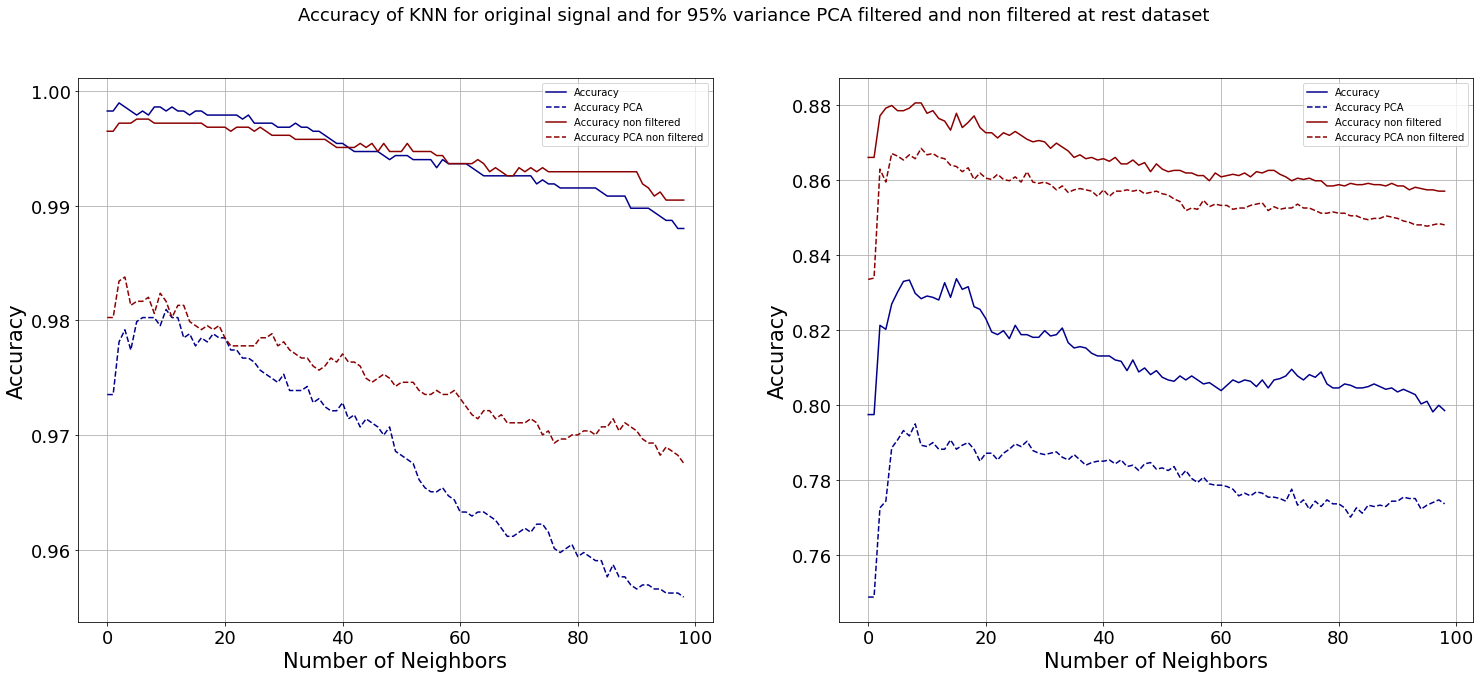

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,10)) 
fig.suptitle("Accuracy of KNN for original signal and for 95% variance PCA filtered and non filtered at rest dataset",fontsize=18) 
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label]): 
    item.set_fontsize(21) 
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()): 
    item.set_fontsize(18) 
ax1.plot(accuracy, 'darkblue')
ax1.plot(accuracy_PCA, 'darkblue', linestyle='dashed')
ax1.plot(accuracy_no, 'darkred')
ax1.plot(accuracy_PCA_no, 'darkred', linestyle='dashed')
ax1.legend(["Accuracy","Accuracy PCA", "Accuracy non filtered","Accuracy PCA non filtered"])
ax1.set_xlabel("Number of Neighbors")
ax1.set_ylabel("Accuracy")
ax1.grid() 

for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label]): 
    item.set_fontsize(21) 
for item in (ax2.get_xticklabels() + ax2.get_yticklabels()): 
    item.set_fontsize(18) 
ax2.plot(accuracy_pp, 'darkblue')
ax2.plot(accuracy_PCA_pp, 'darkblue', linestyle='dashed')
ax2.plot(accuracy_no_pp, 'darkred')
ax2.plot(accuracy_PCA_no_pp, 'darkred', linestyle='dashed')
ax2.legend(["Accuracy","Accuracy PCA", "Accuracy non filtered","Accuracy PCA non filtered"])
ax2.set_xlabel("Number of Neighbors")
ax2.set_ylabel("Accuracy")
ax2.grid() 
plt.savefig("./img/knn.pdf")